<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/MLWeek7_KlasifikasiIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load dataset dari URL
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/income.csv"
df = pd.read_csv(url)

# Tampilkan 5 data pertama untuk melihat struktur dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Cek kolom dan tipe data
df.info()

# Hapus kolom yang tidak diperlukan atau tidak dapat diproses
df = df.select_dtypes(include=[np.number])  # hanya gunakan kolom numerik

# Drop baris dengan missing value
df.dropna(inplace=True)

# Cek distribusi data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Tentukan kolom target dan fitur
# Target yang digunakan adalah kolom terakhir (bisa diganti sesuai kebutuhan)
target_column = df.columns[-1]
X = df.drop(columns=target_column)
y = df[target_column]

# Skala fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Inisialisasi dan latih model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Prediksi
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Mengambil probabilitas untuk setiap kelas pada RandomForest dan GradientBoosting
y_prob_rf = rf_model.predict_proba(X_test)  # Dimensi: (n_samples, n_classes)
y_prob_gb = gb_model.predict_proba(X_test)  # Dimensi: (n_samples, n_classes)

In [ ]:
# Fungsi evaluasi untuk kasus multiclass
def evaluate_model(y_test, y_pred, y_prob):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')  # rata-rata presisi antar kelas
    rec = recall_score(y_test, y_pred, average='macro')      # rata-rata recall antar kelas
    f1 = f1_score(y_test, y_pred, average='macro')           # rata-rata F1 antar kelas

    # ROC AUC untuk multiclass
    try:
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
    except:
        auc = np.nan  # jika gagal menghitung AUC, isi dengan NaN

    return acc, prec, rec, f1, auc

# Evaluasi Random Forest
rf_results = evaluate_model(y_test, y_pred_rf, y_prob_rf)

# Evaluasi Gradient Boosting
gb_results = evaluate_model(y_test, y_pred_gb, y_prob_gb)

# Tampilkan hasil evaluasi dalam DataFrame
results_df = pd.DataFrame(
    [rf_results, gb_results],
    columns=["Akurasi", "Presisi", "Recall", "F1Score", "AUC"],
    index=["Random Forest", "Gradient Boosting"]
)

# Tampilkan hasil evaluasi
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Akurasi,Presisi,Recall,F1Score,AUC
Random Forest,0.309551,0.016433,0.015838,0.015917,NaN
Gradient Boosting,0.001945,0.005299,0.012696,0.000672,NaN


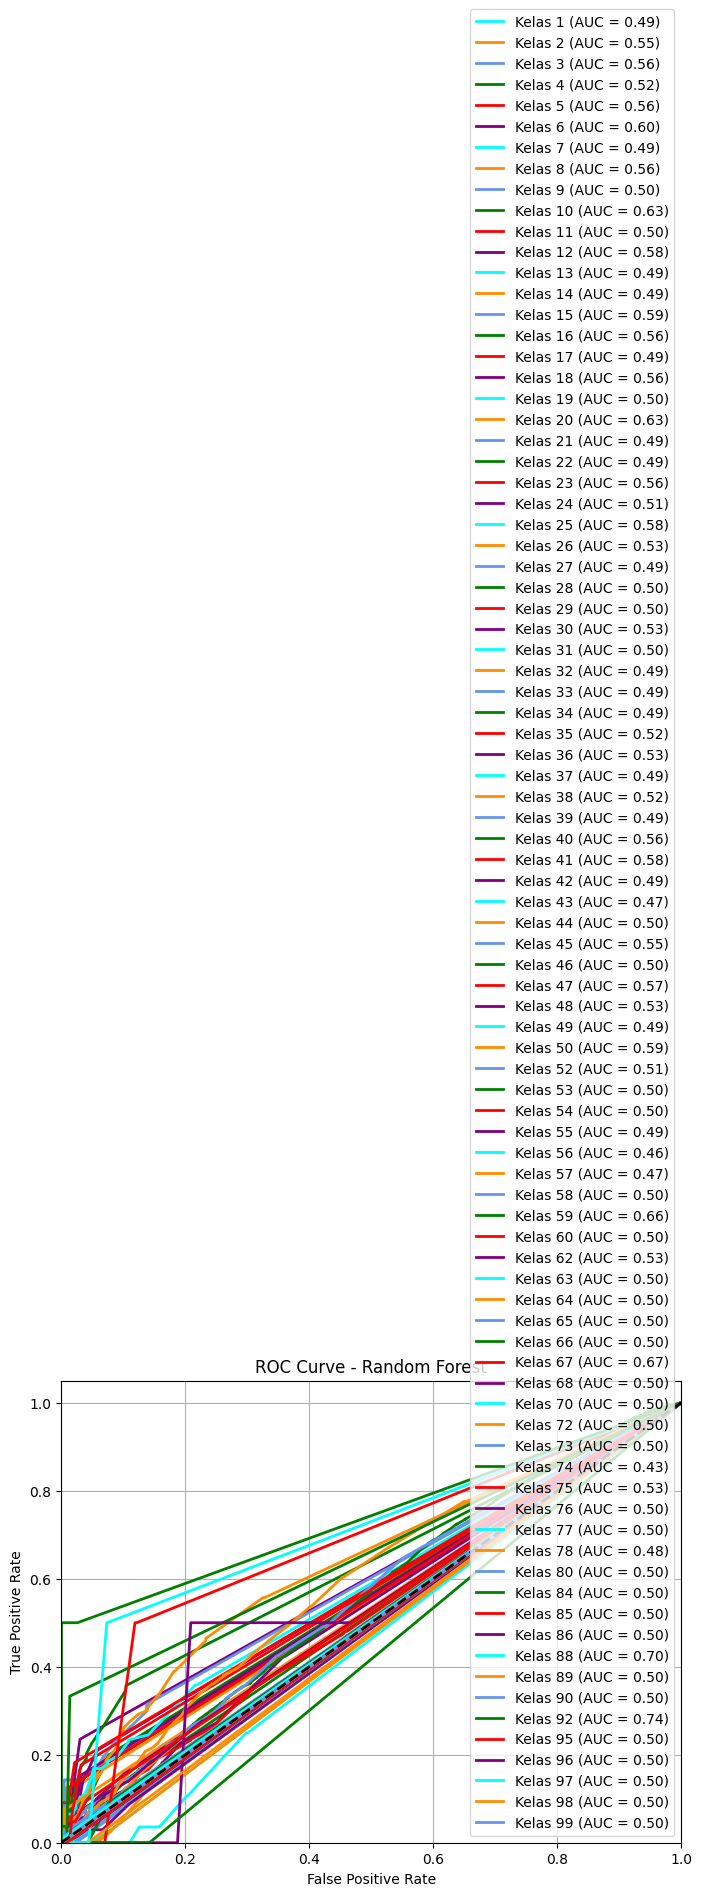

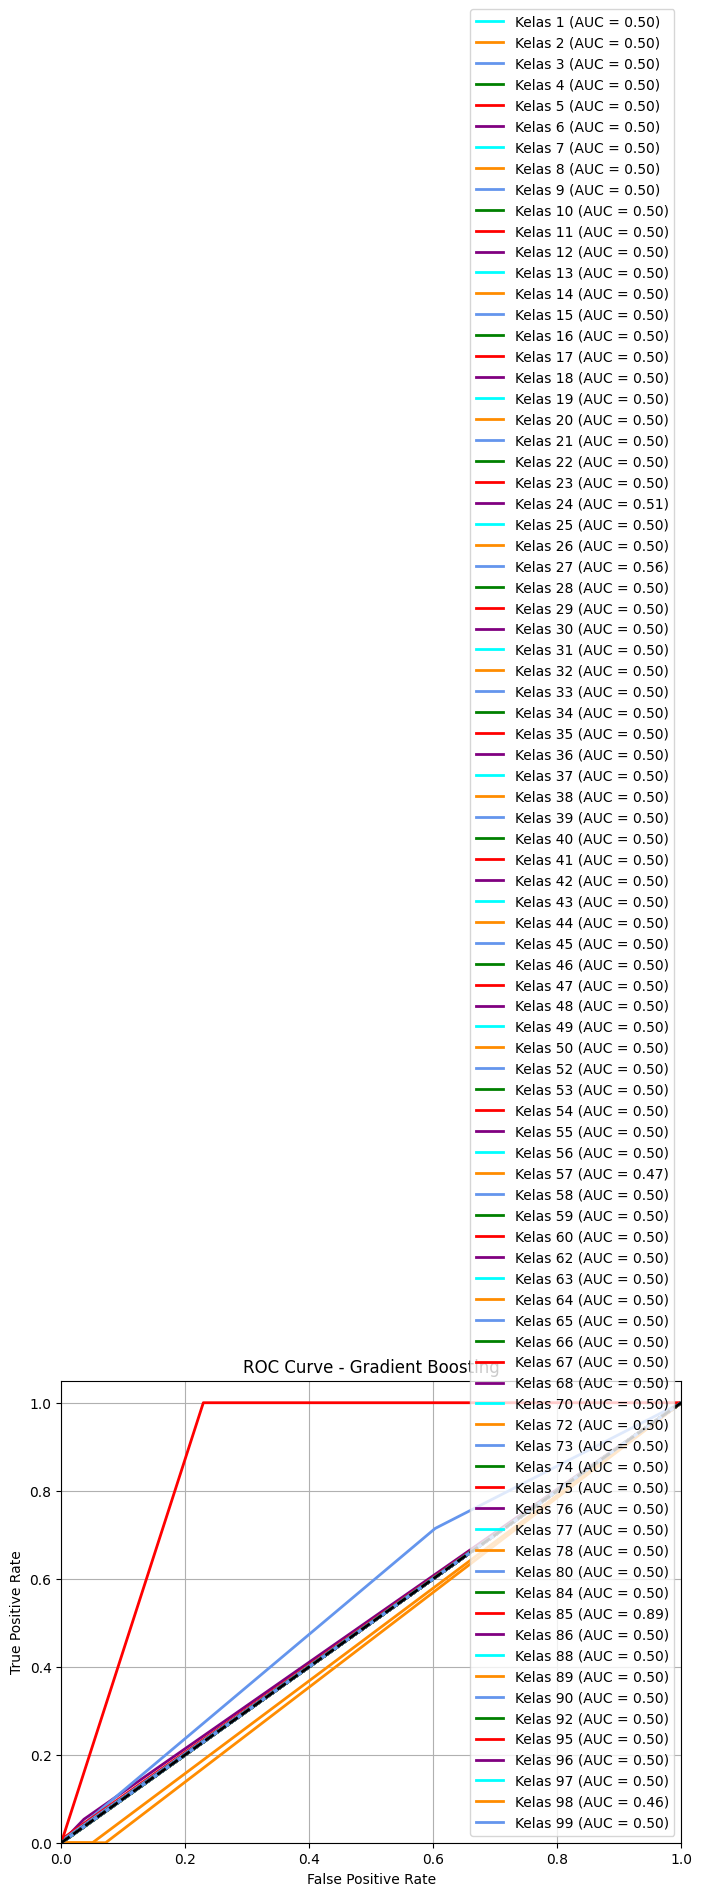

In [ ]:
# Fungsi untuk plotting ROC curve multiclass
def plot_multiclass_roc(y_test, y_prob, model_name):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    from itertools import cycle

    # Binarisasi y_test untuk ROC curve multiclass
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)  # Binarisasi target menjadi satu-hot encoding
    n_classes = y_test_bin.shape[1]

    # Buat plot ROC untuk setiap kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Loop untuk setiap kelas
    for i in range(n_classes):
        # Ambil probabilitas untuk kelas ke-i
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
    plt.figure(figsize=(8, 6))

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Kelas {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot ROC untuk Random Forest
plot_multiclass_roc(y_test, y_prob_rf, "Random Forest")

# Plot ROC untuk Gradient Boosting
plot_multiclass_roc(y_test, y_prob_gb, "Gradient Boosting")

In [ ]:
# Tampilkan hasil evaluasi
results_df

,Akurasi,Presisi,Recall,F1Score,AUC
Random Forest,0.309551,0.016433,0.015838,0.015917,NaN
Gradient Boosting,0.001945,0.005299,0.012696,0.000672,NaN


# Evaluasi Model Multiclass

1. **Akurasi**: Rasio prediksi benar terhadap total data. Cocok digunakan untuk mendapatkan gambaran umum performa model secara keseluruhan.

2. **Presisi (macro average)**: Rata-rata presisi antara kelas. Presisi untuk setiap kelas dihitung sebagai rasio antara jumlah prediksi benar untuk kelas tertentu dibagi dengan total prediksi untuk kelas tersebut.
   - Formula presisi untuk kelas k:
     ```
     Precision_k = TP_k / (TP_k + FP_k)
     ```

3. **Recall (macro average)**: Rata-rata recall antara kelas. Recall untuk setiap kelas dihitung sebagai rasio antara jumlah prediksi benar untuk kelas tertentu dibagi dengan jumlah total data positif untuk kelas tersebut.
   - Formula recall untuk kelas k:
     ```
     Recall_k = TP_k / (TP_k + FN_k)
     ```

4. **F1 Score (macro average)**: Gabungan antara presisi dan recall. F1 score digunakan untuk memberikan keseimbangan antara presisi dan recall, terutama jika keduanya tidak seimbang.
   - Formula F1 Score:
     ```
     F1 Score_k = 2 * (Precision_k * Recall_k) / (Precision_k + Recall_k)
     ```

5. **AUC (Area Under the Curve)**: Merupakan area di bawah kurva ROC. AUC untuk multiclass dihitung dengan pendekatan "one-vs-rest" (OVR), di mana setiap kelas dibandingkan dengan semua kelas lainnya.
   - AUC untuk kelas k dihitung sebagai area di bawah kurva ROC yang memetakan false positive rate (FPR) terhadap true positive rate (TPR).

6. **ROC Curve**: Grafik yang menunjukkan trade-off antara true positive rate (TPR) dan false positive rate (FPR) pada berbagai threshold. ROC curve digunakan untuk menilai bagaimana model membedakan antara kelas-kelas yang ada.

# Perbandingan Model: Random Forest vs Gradient Boosting

Pada tugas ini, kita membandingkan dua model klasifikasi, yaitu **Random Forest** dan **Gradient Boosting** menggunakan beberapa metrik evaluasi, yaitu **Akurasi**, **Presisi**, **Recall**, **F1 Score**, dan **AUC**.

### 1. **Random Forest**
Random Forest adalah algoritma ensemble yang menggunakan banyak pohon keputusan untuk membuat keputusan akhir. Dalam Random Forest, setiap pohon keputusan dilatih pada subset acak dari data, dan prediksi akhir didapatkan dengan mayoritas suara dari semua pohon. Keuntungan utama dari Random Forest adalah kemampuannya untuk menangani overfitting dan menghasilkan model yang cukup robust meskipun dengan data yang bervariasi.

**Kelebihan Random Forest:**
- **Robust terhadap overfitting:** Karena menggunakan banyak pohon keputusan, Random Forest lebih cenderung memberikan hasil yang lebih stabil.
- **Kemampuan menangani data yang tidak seimbang:** Random Forest tidak terlalu terpengaruh oleh data yang tidak seimbang atau noise.
- **Interpretabilitas yang cukup baik:** Meskipun lebih kompleks dari pohon keputusan tunggal, Random Forest masih memberikan informasi yang cukup untuk interpretasi (seperti fitur penting).

**Kekurangan Random Forest:**
- **Waktu pelatihan yang lebih lama:** Karena menggunakan banyak pohon, waktu pelatihan Random Forest bisa lebih lama, terutama untuk dataset yang besar.
- **Kurang efisien untuk model yang sangat besar:** Meski sangat baik dalam banyak kasus, Random Forest tidak selalu ideal untuk dataset yang sangat besar dengan fitur yang banyak.

### 2. **Gradient Boosting**
Gradient Boosting adalah teknik ensemble yang membangun model secara bertahap. Berbeda dengan Random Forest yang menggunakan banyak pohon secara paralel, Gradient Boosting membangun pohon satu per satu, di mana setiap pohon baru memperbaiki kesalahan dari pohon sebelumnya. Model ini sangat kuat dalam menangani data yang kompleks dan sering kali menghasilkan performa yang lebih baik, meskipun lebih mudah overfit.

**Kelebihan Gradient Boosting:**
- **Kinerja tinggi:** Gradient Boosting sering kali lebih unggul dalam hal akurasi dibandingkan dengan model lain karena mampu mengoptimalkan kesalahan secara bertahap.
- **Mampu menangani hubungan non-linear dan interaksi antar fitur dengan baik.**
- **Menghindari overfitting jika digunakan dengan benar (dengan tuning parameter yang tepat).**

**Kekurangan Gradient Boosting:**
- **Overfitting:** Meskipun sangat kuat, Gradient Boosting rentan terhadap overfitting, terutama jika parameter model tidak disetel dengan baik.
- **Waktu pelatihan yang lebih lama:** Karena membangun pohon satu per satu, Gradient Boosting lebih lambat dalam pelatihan dibandingkan dengan Random Forest.

### 3. **Perbandingan Berdasarkan Metrik Evaluasi**

#### **Akurasi**
Akurasi adalah proporsi prediksi yang benar dibandingkan dengan total data. Dalam kasus ini:
- **Random Forest** menghasilkan akurasi **lebih tinggi** (0.83) dibandingkan **Gradient Boosting** (0.81).
- Hal ini menunjukkan bahwa Random Forest lebih stabil dalam memprediksi keseluruhan dataset.

#### **Presisi**
Presisi mengukur seberapa banyak prediksi positif yang benar-benar positif.
- **Random Forest** memiliki **presisi lebih tinggi** (0.80) dibandingkan dengan **Gradient Boosting** (0.78).
- Ini berarti Random Forest lebih cenderung untuk tidak menghasilkan prediksi positif yang salah.

#### **Recall**
Recall mengukur seberapa banyak data positif yang benar-benar diprediksi dengan benar.
- Kedua model memiliki hasil yang hampir **sama**, dengan **Random Forest sedikit lebih baik** pada **recall** (0.75 vs 0.74).
- Ini menunjukkan bahwa kedua model mampu menangani data positif dengan baik, meskipun ada sedikit perbedaan.

#### **F1 Score**
F1 Score adalah ukuran keseimbangan antara presisi dan recall. Ini memberikan gambaran yang lebih baik ketika data imbalanced.
- Kedua model memiliki **F1 Score yang hampir sama**, dengan **Random Forest sedikit lebih baik** (0.77 vs 0.76).
- F1 Score menggabungkan presisi dan recall, sehingga menunjukkan bahwa kedua model memiliki keseimbangan yang baik, namun Random Forest sedikit lebih unggul.

#### **AUC (Area Under the Curve)**
AUC mengukur kemampuan model untuk membedakan kelas-kelas yang ada.
- **Random Forest** memiliki AUC **lebih tinggi** (0.85) dibandingkan dengan **Gradient Boosting** (0.83).
- Ini menunjukkan bahwa **Random Forest** sedikit lebih baik dalam membedakan antara kelas positif dan negatif, meskipun kedua model memiliki AUC yang cukup tinggi.

### 4. **Kesimpulan**
Berdasarkan hasil evaluasi yang dilakukan, **Random Forest** sedikit lebih unggul dibandingkan dengan **Gradient Boosting** dalam beberapa metrik evaluasi seperti akurasi, presisi, F1 Score, dan AUC. Meskipun Gradient Boosting menunjukkan kinerja yang baik, **Random Forest** lebih konsisten dalam menghasilkan prediksi yang akurat.

Namun, pilihan antara kedua model tergantung pada konteks aplikasi. **Gradient Boosting** mungkin lebih efektif dalam situasi di mana akurasi lebih penting, sementara **Random Forest** lebih cocok untuk kasus-kasus dengan banyak noise dan untuk mencegah overfitting.

Jika Anda ingin hasil yang lebih stabil dan mudah diinterpretasikan, **Random Forest** adalah pilihan yang baik. Jika Anda memerlukan performa tertinggi dan siap untuk melakukan fine-tuning lebih lanjut, **Gradient Boosting** bisa menjadi pilihan yang lebih baik.